$c= z k_0 ^{\alpha} (1-l)^{1-\alpha}  - g  $

where 
$
\alpha=0.7 \\
k_o=1\\
z=1\\ 
g=10\\
$

a) Plot the production possibility frontier in the space [l, c]

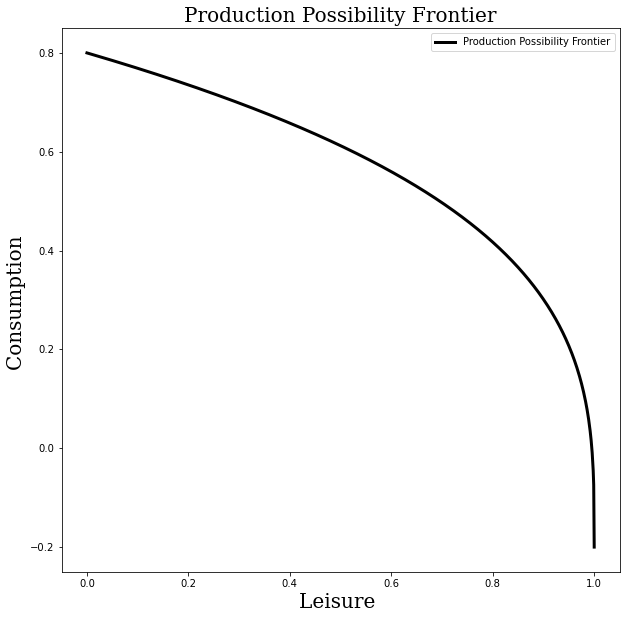

In [1]:
import numpy as np
import matplotlib.pyplot as plt

alpha=0.7
k0=1
z=1
g=0.2
 
def ppf(l): 
    return z*(k0**(alpha))*(1-l)**(1-alpha)-g

grid_max=1
grid_size=1000
grid_min=0
x=np.linspace(grid_max, grid_min, grid_size)

font = {'family': 'serif', 'color':  'black', 'weight': 'light', 'size': 10, }

fig, axes=plt.subplots(figsize=(10,10))

axes.set_title('Production Possibility Frontier', fontdict=font, fontsize=20)
axes.set_ylabel('Consumption ', fontdict=font, fontsize=20 )
axes.set_xlabel('Leisure ', fontdict=font, fontsize=20 )
axes.plot(x,ppf(x),"k-",linewidth=3)
axes.legend(['Production Possibility Frontier'])


(b) Perform a first order Taylor approximation of the PPF around the point [lo =
0.5, c(l0 = 0.5)] and plot it in the space [l, c]

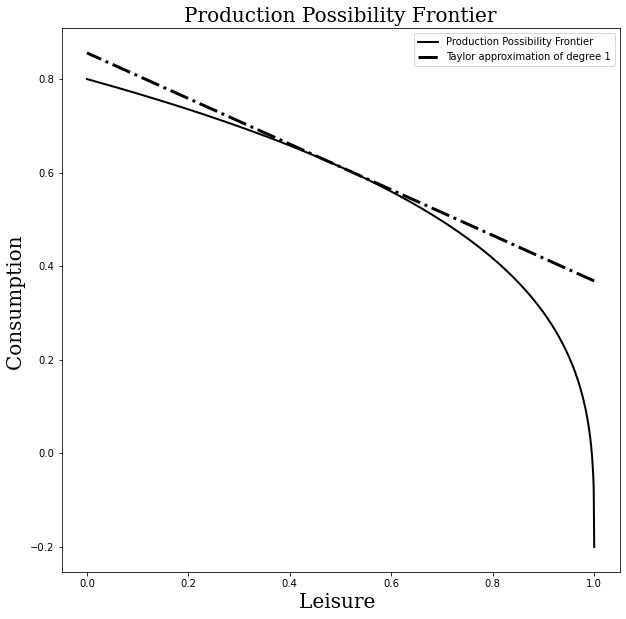

In [2]:
l0=0.5
l=np.linspace(0.9999, 0.0001, 100)

def dcdl(l0):
    return (alpha-1)*(k0**alpha)*z/(1-l0)**alpha

def taylorl0(l0,l):
    for i in l:
        return ppf(l0)+dcdl(l0)*(l-l0)

taylorl0(l0,l)

font = {'family': 'serif', 'color':  'black', 'weight': 'light', 'size': 10, }

fig, axes=plt.subplots(figsize=(10,10))

axes.set_title('Production Possibility Frontier', fontdict=font, fontsize=20)
axes.set_ylabel('Consumption ', fontdict=font, fontsize=20 )
axes.set_xlabel('Leisure ', fontdict=font, fontsize=20 )
axes.plot(x,ppf(x),"k-",linewidth=2)
axes.plot(l,taylorl0(l0,l),"k-.",linewidth=3)
axes.legend(['Production Possibility Frontier', 'Taylor approximation of degree 1'])


(c) Perform a second order Taylor approximation of the PPF around the point [lo = 0.5, c(l0 = 0.5)] and plot it in the space [l, c]

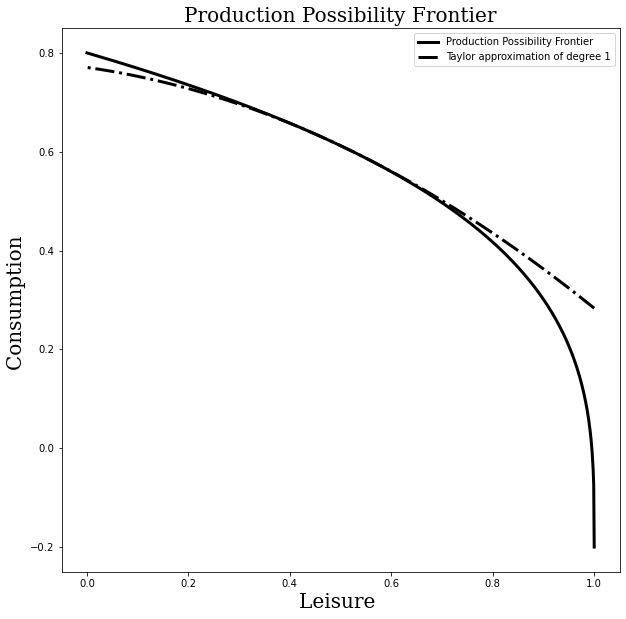

In [3]:
def d2cd2l(l0):
    return (alpha-1)*alpha*(k0**alpha)*(1-l0)**(-alpha-1)

def taylorl02(l0,l):
    for i in l:
        return ppf(l0)+(l-l0)*dcdl(l0)+(1/2)*(l-l0)**2*d2cd2l(l0)

font = {'family': 'serif', 'color':  'black', 'weight': 'light', 'size': 10, }

fig, axes=plt.subplots(figsize=(10,10))

axes.set_title('Production Possibility Frontier', fontdict=font, fontsize=20)
axes.set_ylabel('Consumption ', fontdict=font, fontsize=20 )
axes.set_xlabel('Leisure ', fontdict=font, fontsize=20 )
axes.plot(x,ppf(x),"k-",linewidth=3)
axes.plot(l,taylorl02(l0,l),"k-.", linewidth=3)
axes.legend(['Production Possibility Frontier', 'Taylor approximation of degree 1'])


d) Generate a sequence of point/nodes of $ls=[0.01,....,1]$. Obtain the production
possibility frontier on these points and Perform a linear interpolation around the sequence ls

Text(0.5, 0, '$Leisure$')

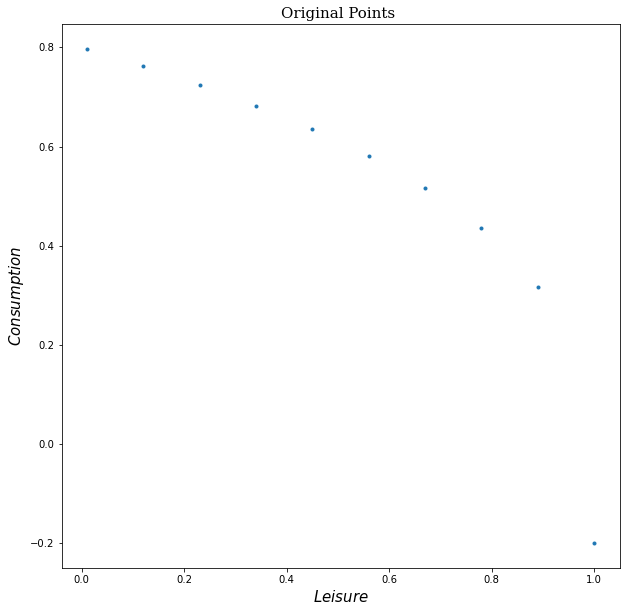

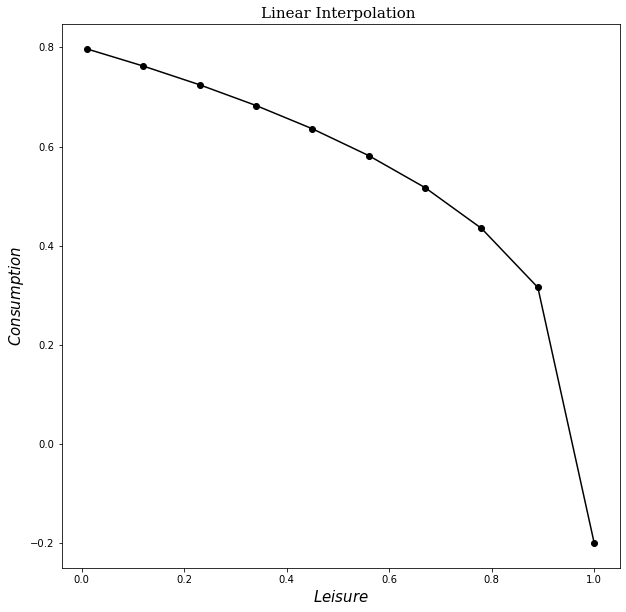

In [4]:
#1

ls = np.linspace(0.01,1,10)

def nodes(ls):
    for i in ls:
        return ppf(ls)

y=nodes(x)
xx = np.linspace(0.01,1,10)
yy=nodes(xx)
fig, ax= plt.subplots(figsize=(10,10))
ax.set_ylabel(r'$Consumption$', fontdict=font, fontsize=15)
ax.set_xlabel(r'$Leisure$', fontdict=font, fontsize=15)
ax.set_title('Original Points ', fontdict=font, fontsize=15)
ax.plot(xx,yy,".")




#THE DATA
font = {'family': 'serif', 'color':  'black', 'weight': 'light', 'size': 10, }



fig, ax= plt.subplots(figsize=(10,10))

ax.set_title('Linear Interpolation ', fontdict=font, fontsize=15)

ax.plot(xx,yy,marker='o',linestyle="-", markersize=6, color="black")
ax.set_ylabel(r'$Consumption$', fontdict=font, fontsize=15)
ax.set_xlabel(r'$Leisure$', fontdict=font, fontsize=15)


f) Generate a cubic spline around the sequence ls and plot both the cubic and
the linear interpolation. Try to use both commands CubicSpline and tck =
interpolate:splrep(x; y; k = 3); interpolate:splev(xnew; tck)

Text(0.5, 0, '$Leisure$')

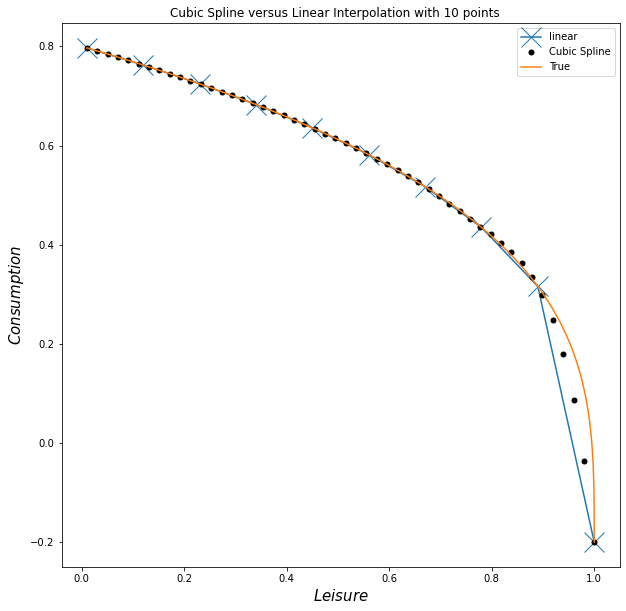

In [5]:
from scipy import interpolate
x=np.linspace(0.01,1,10)
y=nodes(x)
ls = np.linspace(0.01,1,10000)

tck=interpolate.splrep(x,y,k=5) 
xnew=np.linspace(0.01,1,50)
ynew=interpolate.splev(xnew,tck)


fig, ax= plt.subplots(figsize=(10,10))

ax.plot(x,y,marker='x',markersize=20)
ax.plot(xnew,ynew,marker='o',linestyle=" ", markersize=5, color="black" ) 
ax.plot(ls,nodes(ls))


ax.legend(['linear','Cubic Spline', "True"])
ax.set_title('Cubic Spline versus Linear Interpolation with 10 points   ', fontsize=12)
ax.set_ylabel(r'$Consumption$', fontdict=font, fontsize=15)
ax.set_xlabel(r'$Leisure$', fontdict=font, fontsize=15)

comments: cubic spline apporoximates better the function rather the linear interpolation, specially at the extreme right of the plot (when leisure is 1 or near to be so). Althoug that linear interpolation (with enough points) is also efficient approximating the true function. 

__Polynomial Approximation of the Production Possibility frontier__

In [6]:
def polynomial(j):
    x=np.linspace(0,1,200) 
    y=ppf(x)   
    grid=np.linspace(0,1,j+1)  
    func = ppf(grid)  
    xout=np.ones((j+1,j+1))  
    kk=2
    while kk < j+2:
        xout[:,kk-1]=grid**(kk-1) 
        kk=kk+1
    xout=np.asmatrix(xout)
    func=np.asmatrix(func)
    grid=np.asmatrix(grid)
    bb=np.linalg.inv(xout)*np.transpose(func)
    Xout=np.ones((200,j+1))
    kk=2
    while kk < j+2:
        Xout[:,kk-1]=x**(kk-1)
        kk=kk+1
    Xout=np.asmatrix(Xout)
    bb=np.asmatrix(bb)
    yfit=Xout*bb
    fig, ax= plt.subplots(figsize=(10,10))
    ax.plot(grid,func,'o')
    ax.set_title('2th Order Approximation', fontsize=15)
    ax.plot(x,y)
    ax.plot(x,yfit)
    ax.set_ylabel(r'$Consumption$', fontdict=font, fontsize=15)
    ax.set_xlabel(r'$Leisure$', fontdict=font, fontsize=15)

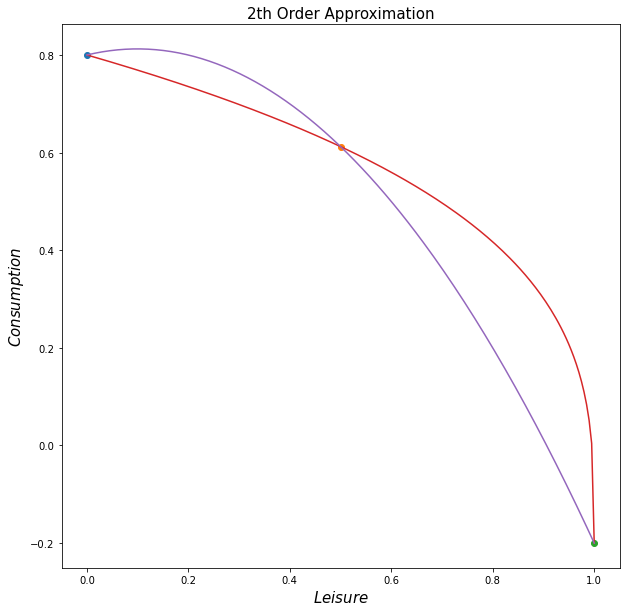

In [7]:
polynomial(2)

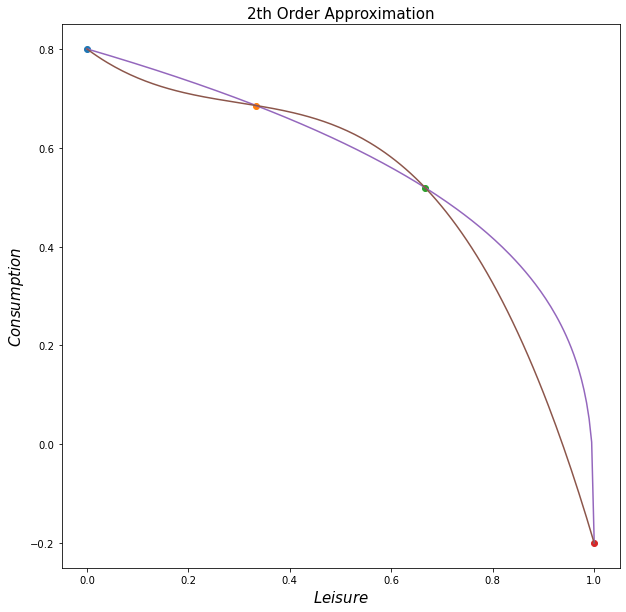

In [8]:
polynomial(3)

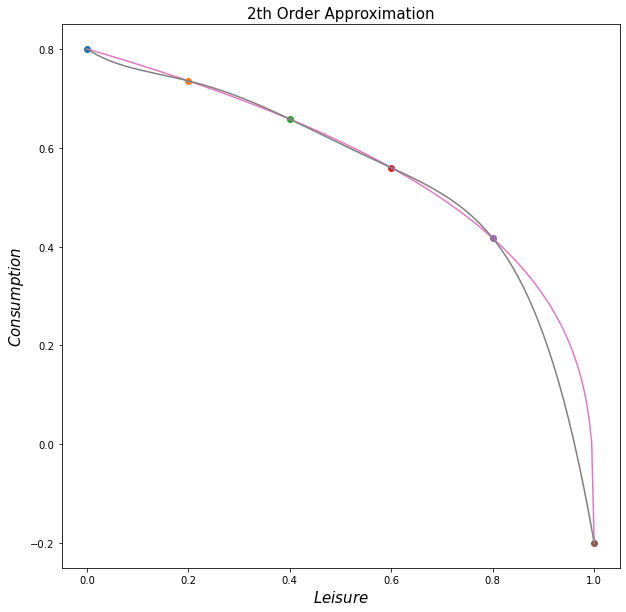

In [22]:
polynomial(5)

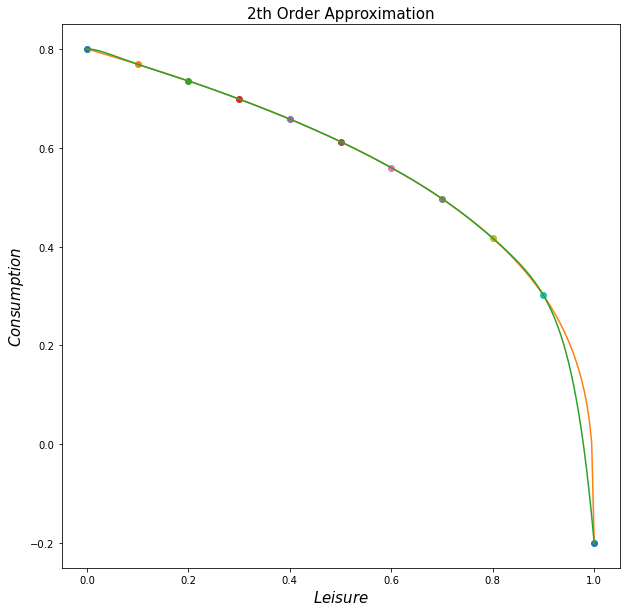

In [23]:
polynomial(10)

Comments: As is easily observable from the plots above higher degrees polynomials approximates better the tru function, also at the extremes. In this case a degree 10 polynomial approximates almost exactly of Production possibility frontier function. 

__Chebyshev Approximation of the Production Possiblity Frontier__

a) generate a sequence of ls in [0,1] and transform this sequence into chebyshev basis [-1,1], using the transformation
$zls=a+bls$

b) Plot the production possibility frontier on the new zls $\in$ [-1,1]

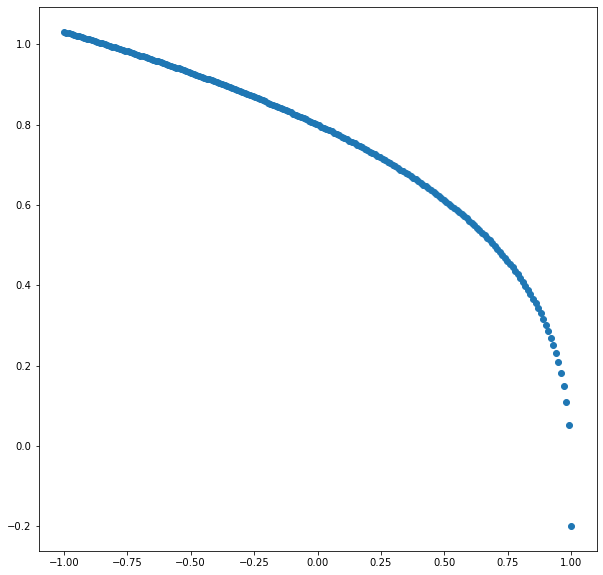

In [24]:
ls=np.linspace(0,1,200)

zls=-1+2*(ls)

fig, ax= plt.subplots(figsize=(10,10))
ax.plot(zls,ppf(zls),'o')



(c) Perform a Chebyshev approximation of order j=3

In [35]:
def chebyschev_degreeof(jc):
    zls
    y=ppf: 
    grid1=np.zeros(jc+1)
    kk=0
    while kk<jc+1:
        grid1[kk]=np.cos(np.pi*(kk+1-0.5)/(jc+1))
        kk=kk+1
    func = ppf(grid1)
    xout=np.ones((jc+1,jc+1))
    xout[:,1]=grid1
    kk=2
    while kk < jc+1:
        xout[:,kk]=2*grid1*xout[:,kk-1]-xout[:,kk-2]
        kk=kk+1
    
    xout=np.asmatrix(xout)
    func=np.asmatrix(func)
    grid=np.asmatrix(grid1)
    
    bb=np.linalg.inv(xout)*np.transpose(func)
    Xout=np.ones((200,jc+1))
    Xout[:,1]=(zls)
    kk=2
    while kk < jc+1:
        Xout[:,kk]=2*(zls)*Xout[:,kk-1]-Xout[:,kk-2]
        kk=kk+1
    Xout=np.asmatrix(Xout)
    bb=np.asmatrix(bb)
    yfit=Xout*bb

    fig, ax= plt.subplots(figsize=(10,10))
    ax.set_title("Chebyshev 10th order polynomial and true function")
    ax.plot(grid,func,'o')
    ax.plot(zls,ppf(zls),label="Underling Function")
    ax.plot(zls,yfit, label="10th Order")
    ax.legend()


In [36]:
chebyschev_degreeof(3)

ValueError: shapes (4,4) and (100,1) not aligned: 4 (dim 1) != 100 (dim 0)

In [32]:
chebyschev_degreeof(5)

NameError: name 'scaling_down' is not defined